# MEFE - TP computacional 3

**Tomás Di Napoli**

Este trabajo es la resolución del tercer TP computacional de [MEFE](http://materias.df.uba.ar/meefea2023c1/), cuya consigna se puede ver [acá](http://materias.df.uba.ar/meefea2023c1/files/2012/07/Test_de_Hip%C3%B3tesis_MEFE_2023_Madres21.pdf). También tiene su versión en [Jupyter Notebook]() junto con otros ejercicios de la materia que estoy subiendo a [este](https://github.com/tdinapoli/mefe/) repositorio de github.

Primero que nada importo las librerías que voy a usar y configuro el estilo de los gráficos

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as ss
plt.style.use('seaborn')
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

El problema consiste en determinar si la cantidad de hijas que tienen las levaduras por unidad de tiempo es constante o no en el tiempo. Sin embargo, en el experimento que proponen no se puede medir esto directamente sino que contamos con un chip de microfluídica que nos permite contar cantidad de hijas que tiene una levadura a lo largo de toda su vida.

Por suerte sabemos que la distribución de probabilidad que describe la cantidad de hijas que tiene una levadura hasta que muere está dada por la distribución de *Weibull*
$$Weibull(x \mid \lambda, \alpha) = \lambda \alpha (\lambda x)^{\alpha - 1} e^{-(\lambda x)^\alpha},$$
y que el valor de $\alpha = 1$ se asocia a una tasa de nacimientos constante en el tiempo.

Más específicamente (y por algún motivo extraño) queremos distinguir, dada la medición de cuántas hijas tuvieron varias levaduras durante su vida, si provienen de una distribución de *Weibull* con $\lambda = 1/30$ y $\alpha = 1$ (tasa de nacimientos constante en el tiempo) o de una con $\lambda = 1/30$ y $\alpha = 0.8$ (tasa decreciente en el tiempo). Enunciado el problema podemos identificar la hipótesis nula $H_0$ y la hipótesis alternativa $H_1$:

- **$H_0$**: Las levaduras provienen de una distribución de $Weibull(x \mid \lambda = 1/30, \alpha_0 = 1)$.
- **$H_1$**: Las levaduras provienen de una distribución de $Weibull(x \mid \lambda = 1/30, \alpha_1 = 0.8)$.

Es importante notar que ambas hipótesis son simples, es decir que las poblaciones asociadas a cada hipótesis están fijas a una distribución de probabilidad completamente definida, sin grados de libertad. Para mi no tiene sentido hacer un test de este estilo en este caso, porque la hipótesis nula $H_0$ tiene un significado concreto (la tasa de nacimientos es constante) mientras que el valor de $\alpha = 0.8$ parece tomado arbitrariamente. Si lo que se quisiera probar es que la tasa es constante entonces habría que comparar $\alpha = 1$ como hipótesis nula contra $\alpha \neq 1$ como hipótesis alternativa, la cuál dejaría de ser simple en este caso. 

Reemplazando para los valores particulares de cada hipótesis, las distribuciones correspondientes quedan

$$W_0(x \mid \lambda = 1/30, \alpha = 1) = \frac{e^{(-\frac{x}{30})}}{30}$$
$$W_1(x \mid \lambda = 1/30, \alpha = 0.8) = \frac{4}{150} \left( \frac{4x}{150} \right)^{1/5} e^{-(\frac{x}{30})^{4/5}}$$

Bueno, me callo y arranco con los problemas.

## Problemas 1 y 2

Me piden generar 100 realizaciones de variables aleatorias correspondientes a cada una de las hipótesis. Para eso primero defino los parámetros del problema y creo las variables aleatorias

In [7]:
# Defino los parámetros
lmbd = 1/30
alpha0 = 1
alpha1 = 0.8
# Creo las variables aleatorias (por cómo está 
# definido debo poner 1/lambda en la escala)
wbc = ss.weibull_min(alpha0, scale=1/lmbd, loc=0)
wbd = ss.weibull_min(alpha1, scale=1/lmbd, loc=0)

Genero dos muestras de 100 mediciones de cada una de las variables aleatorias.

In [8]:
# Genero muestras de 100 datos de cada distribución
samplec = wbc.rvs(size=100)
sampled = wbd.rvs(size=100)

Ahora grafico los histogramas de las variables aleatorias, y para ganar más intuición también sus pdf entre los valores de $x$ para los cuales la cdf es 0.01 y 0.99.

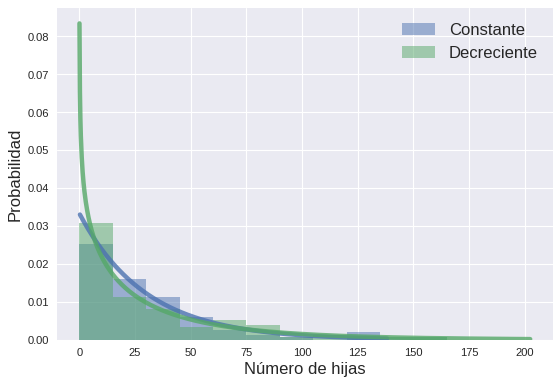

In [11]:
# Genero los x para graficar
x1 = np.linspace(wbc.ppf(0.01), wbc.ppf(0.99), 1000)
x2 = np.linspace(wbd.ppf(0.01), wbd.ppf(0.99), 1000)

# Grafico los histogramas normalizados
bins = np.arange(0, 201, 15, dtype=int)
freq, bin_edges = np.histogram(samplec, density=True, bins=bins)
plt.stairs(freq, bin_edges, fill=True, alpha=0.5,
           color="C0", label="Constante")
freq, bin_edges = np.histogram(sampled, density=True, bins=bins)
plt.stairs(freq, bin_edges, fill=True, alpha=0.5,
           color="C1", label="Decreciente")

# Grafico las distribuciones sobre los histogramas.
plt.plot(x1, wbc.pdf(x1), lw=4, alpha=0.8, color="C0")
plt.plot(x2, wbd.pdf(x2), lw=4, alpha=0.8, color="C1")
plt.legend()
plt.xlabel("Número de hijas")
plt.ylabel("Probabilidad")
plt.show()

Al ser exponenciales, quizás es mejor visualizar esto con escala logarítmica en el eje y. Repito todo pero pongo plt.yscale("log") al final (lamentablemente no encontré la forma de hacer esto sin repetir el código).

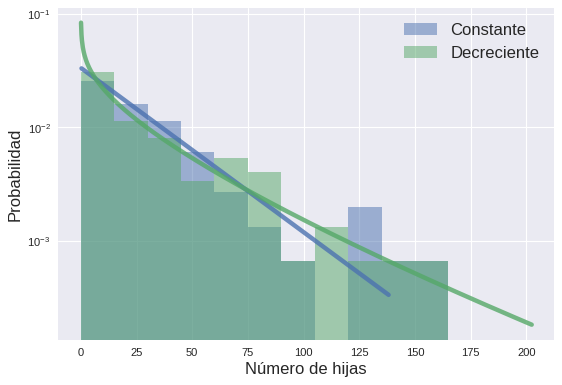

In [12]:
# Genero los x para graficar
x1 = np.linspace(wbc.ppf(0.01), wbc.ppf(0.99), 1000)
x2 = np.linspace(wbd.ppf(0.01), wbd.ppf(0.99), 1000)

# Grafico los histogramas normalizados
bins = np.arange(0, 201, 15, dtype=int)
freq, bin_edges = np.histogram(samplec, density=True, bins=bins)
plt.stairs(freq, bin_edges, fill=True, alpha=0.5, color="C0", label="Constante")
freq, bin_edges = np.histogram(sampled, density=True, bins=bins)
plt.stairs(freq, bin_edges, fill=True, alpha=0.5, color="C1", label="Decreciente")

# Grafico las distribuciones sobre los histogramas.
plt.plot(x1, wbc.pdf(x1), lw=4, alpha=0.8, color="C0")
plt.plot(x2, wbd.pdf(x2), lw=4, alpha=0.8, color="C1")
plt.legend()
plt.xlabel("Número de hijas")
plt.ylabel("Probabilidad")
plt.yscale("log")
plt.show()

In [80]:
def estadistico(sample, lmbd, alpha0, alpha1):
    t = (lmbd*sample)**alpha0 - (lmbd*sample)**alpha1 + (alpha1 - alpha0) * np.log(sample)
    return np.sum(t)/len(t)

33.99009288958039


In [83]:
t_h0 = [estadistico(wbc.rvs(size=100), lmbd, 1, 0.8) for _ in range(10000)]
t_h1 = [estadistico(wbd.rvs(size=100), lmbd, 1, 0.8) for _ in range(10000)]
t2_h0 = [np.mean((wbc.rvs(size=100) - wbc.mean())**2/wbc.var()) for _ in range(10000)]
t2_h1 = [np.mean((wbd.rvs(size=100) - wbd.mean())**2/wbd.var()) for _ in range(10000)]

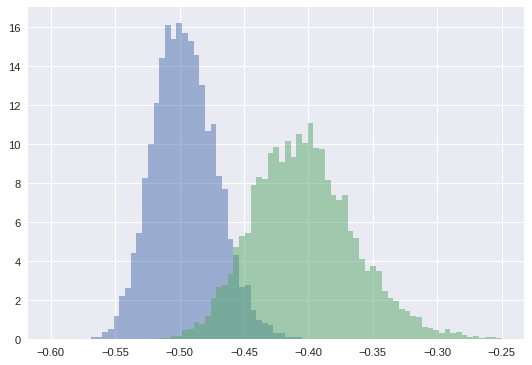

In [84]:
bins = np.linspace(-0.6, -0.25, 80)
freq, bin_edges = np.histogram(t_h0, density=True, bins=bins)
plt.stairs(freq, bin_edges, fill=True, alpha=0.5, color="C0", label="Constante")
freq, bin_edges = np.histogram(t_h1, density=True, bins=bins)
plt.stairs(freq, bin_edges, fill=True, alpha=0.5, color="C1", label="Constante")
plt.show()

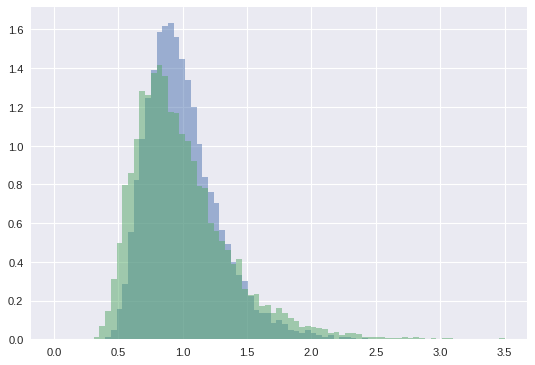

In [87]:
bins = np.linspace(0, 3.5, 80)
freq, bin_edges = np.histogram(t2_h0, density=True, bins=bins)
plt.stairs(freq, bin_edges, fill=True, alpha=0.5, color="C0", label="Constante")
freq, bin_edges = np.histogram(t2_h1, density=True, bins=bins)
plt.stairs(freq, bin_edges, fill=True, alpha=0.5, color="C1", label="Constante")
plt.show()